# Importing Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec, FastText
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, Bidirectional, LSTM, GRU, Layer

In [4]:
!pip uninstall numpy gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/site-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.10/site-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/site-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/site-packages/numpy/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [3]:
!pip install numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 40.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install openpyxl

In [6]:
# Load and Preprocess Data
data = pd.read_excel('/kaggle/input/urdu-dataset1/Proposed Dataset.xlsx')
data.dropna(inplace=True)
data.head()

,sentence,target,sents
0,اس کا تھمب نیل ویگن پورن جیسا لگتا ہے۔,0,اس کا تھمب نیل ویگن پورن جیسا لگتا
1,اس کے بال بہت اچھے ہیں اوہ ما خدا مجھے اس پر و...,0,اس بال بہت اوہ ما خدا مجھے اس واقعی فخر کاش می...
2,یہ ویڈیو کتنی پرانی ہے کیونکہ میں جانتا ہوں کہ...,0,ویڈیو کتنی پرانی کیونکہ میں جانتا آپ کسی بیکن ...
3,اگر وہ مکمل ویگن ہو رہی ہے تو وہ جانتی ہے کہ و...,0,اگر وہ مکمل ویگن وہ جانتی وہ ایسی مصنوعات استع...
4,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...,0,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...


In [7]:
# Tokenization
tokenizer = Tokenizer()
#data['sents'] = data['no stop'].apply(lambda x: str(x).split())
tokenizer.fit_on_texts(data['sents'])
sequences = tokenizer.texts_to_sequences(data['sents'])

In [8]:
# Pad Sequences
vocab_size = len(tokenizer.word_index) + 1
maxlen = max(data['sents'].apply(len))
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [9]:
word2vec = Word2Vec(data['sents'], vector_size=100, window=3, min_count=1, workers=4, epochs=100)

In [10]:
word2vec_embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    word2vec_embedding_matrix[i] = word2vec.wv[word] if word in word2vec.wv else np.zeros(100)

In [11]:
test_data=pd.read_csv('/kaggle/input/urdu-dataset1/train.csv')
test_data.dropna(inplace=True)
test_data.head()

,id,tweet,target
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0


In [12]:
stopwords = ['آئی', 'آئے', 'آج', 'آخر', 'آخرکبر', 'آدهی', 'آًب', 'آٹھ', 'آیب', 'اة', 'اخبزت', 'اختتبم',  'ادھر', 'ارد', 'اردگرد', 'ارکبى', 'اش', 'اضتعوبل', 'اضتعوبلات', 'اضطرذ', 'اضکب', 'اضکی',  'اضکے', 'اطراف', 'اغیب', 'افراد', 'الگ', 'اور', 'اوًچب', 'اوًچبئی', 'اوًچی', 'اوًچے', 'اى',  'اً', 'اًذر', 'اًہیں', 'اٹھبًب', 'اپٌب', 'اپٌے', 'اچھب', 'اچھی', 'اچھے', 'اکثر', 'اکٹھب',  'اکٹھی', 'اکٹھے', 'اکیلا', 'اکیلی', 'اکیلے', 'اگرچہ', 'اہن', 'ایطے', 'ایک', 'ب', 'ت', 'تبزٍ',  'تت', 'تر', 'ترتیت', 'تریي', 'تعذاد', 'تن', 'تو', 'توبم', 'توہی', 'توہیں', 'تٌہب', 'تک',  'تھب', 'تھوڑا', 'تھوڑی', 'تھوڑے', 'تھی', 'تھے', 'تیي', 'ثب', 'ثبئیں', 'ثبترتیت', 'ثبری', 'ثبرے',  'ثبعث', 'ثبلا', 'ثبلترتیت', 'ثبہر', 'ثدبئے', 'ثرآں', 'ثراں', 'ثرش', 'ثعذ', 'ثغیر', 'ثلٌذ',  'ثلٌذوثبلا', 'ثلکہ', 'ثي', 'ثٌب', 'ثٌبرہب', 'ثٌبرہی', 'ثٌبرہے', 'ثٌبًب', 'ثٌذ', 'ثٌذکرو',  'ثٌذکرًب', 'ثٌذی', 'ثڑا', 'ثڑوں', 'ثڑی', 'ثڑے', 'ثھر', 'ثھرا', 'ثھراہوا', 'ثھرپور', 'ثھی',  'ثہت', 'ثہتر', 'ثہتری', 'ثہتریي', 'ثیچ', 'ج', 'خب', 'خبرہب', 'خبرہی', 'خبرہے', 'خبهوظ',  'خبًب', 'خبًتب', 'خبًتی', 'خبًتے', 'خبًٌب', 'خت', 'ختن', 'خجکہ', 'خص', 'خططرذ', 'خلذی',  'خو', 'خواى', 'خوًہی', 'خوکہ', 'خٌبة', 'خگہ', 'خگہوں', 'خگہیں', 'خیطب', 'خیطبکہ', 'در',  'درخبت', 'درخہ', 'درخے', 'درزقیقت', 'درضت', 'دش', 'دفعہ', 'دلچطپ', 'دلچطپی', 'دلچطپیبں',  'دو', 'دور', 'دوراى', 'دوضرا', 'دوضروں', 'دوضری', 'دوضرے', 'دوًوں', 'دکھبئیں', 'دکھبتب',  'دکھبتی', 'دکھبتے', 'دکھبو', 'دکھبًب', 'دکھبیب', 'دی', 'دیب', 'دیتب', 'دیتی', 'دیتے', 'دیر',  'دیٌب', 'دیکھو', 'دیکھٌب', 'دیکھی', 'دیکھیں', 'دے', 'ر', 'راضتوں', 'راضتہ', 'راضتے', 'رریعہ',  'رریعے', 'رکي', 'رکھ', 'رکھب', 'رکھتب', 'رکھتبہوں', 'رکھتی', 'رکھتے', 'رکھی', 'رکھے', 'رہب',  'رہی', 'رہے', 'ز', 'زبصل', 'زبضر', 'زبل', 'زبلات', 'زبلیہ', 'زصوں', 'زصہ', 'زصے', 'زقبئق',  'زقیتیں', 'زقیقت', 'زکن', 'زکویہ', 'زیبدٍ', 'صبف', 'صسیر', 'صفر', 'صورت', 'صورتسبل', 'صورتوں',  'صورتیں', 'ض', 'ضبت', 'ضبتھ', 'ضبدٍ', 'ضبرا', 'ضبرے', 'ضبل', 'ضبلوں', 'ضت', 'ضرور', 'ضرورت',  'ضروری', 'ضلطلہ', 'ضوچ', 'ضوچب', 'ضوچتب', 'ضوچتی', 'ضوچتے', 'ضوچو', 'ضوچٌب', 'ضوچی', 'ضوچیں',  'ضکب', 'ضکتب', 'ضکتی', 'ضکتے', 'ضکٌب', 'ضکی', 'ضکے', 'ضیذھب', 'ضیذھی', 'ضیذھے', 'ضیکٌڈ', 'ضے',  'طرف', 'طریق', 'طریقوں', 'طریقہ', 'طریقے', 'طور', 'طورپر', 'ظبہر', 'ع', 'عذد', 'عظین', 'علاقوں',  'علاقہ', 'علاقے', 'علاوٍ', 'عووهی', 'غبیذ', 'غخص', 'غذ', 'غروع', 'غروعبت', 'غے', 'فرد', 'فی', 'ق',  'قجل', 'قجیلہ', 'قطن', 'لئے', 'لا', 'لازهی', 'لو', 'لوجب', 'لوجی', 'لوجے', 'لوسبت', 'لوسہ',  'لوگ', 'لوگوں', 'لڑکپي', 'لگتب', 'لگتی', 'لگتے', 'لگٌب', 'لگی', 'لگیں', 'لگے', 'لی', 'لیب',  'لیٌب', 'لیں', 'لے', 'ه', 'هتعلق', 'هختلف', 'هسترم', 'هسترهہ', 'هسطوش', 'هسیذ', 'هطئلہ',  'هطئلے', 'هطبئل', 'هطتعول', 'هطلق', 'هعلوم', 'هػتول', 'هلا', 'هوکي', 'هوکٌبت', 'هوکٌہ',  'هٌبضت', 'هڑا', 'هڑًب', 'هڑے', 'هکول', 'هگر', 'هہرثبى', 'هیرا', 'هیری', 'هیرے', 'هیں', 'و',  'وار', 'والے', 'وٍ', 'ًئی', 'ًئے', 'ًب', 'ًبپطٌذ', 'ًبگسیر', 'ًطجت', 'ًقطہ', 'ًو', 'ًوخواى',  'ًکبلٌب', 'ًکتہ', 'ًہ', 'ًہیں', 'ًیب', 'ًے', 'ٓ آش', 'ٹھیک', 'پبئے', 'پبش', 'پبًب', 'پبًچ',  'پر', 'پراًب', 'پطٌذ', 'پل', 'پورا', 'پوچھب', 'پوچھتب', 'پوچھتی', 'پوچھتے', 'پوچھو', 'پوچھوں',  'پوچھٌب', 'پوچھیں', 'پچھلا', 'پھر', 'پہلا', 'پہلی', 'پہلےضی', 'پہلےضے', 'پہلےضےہی', 'پیع',  'چبر', 'چبہب', 'چبہٌب', 'چبہے', 'چلا', 'چلو', 'چلیں', 'چلے', 'چکب', 'چکی', 'چکیں', 'چکے',  'چھوٹب', 'چھوٹوں', 'چھوٹی', 'چھوٹے', 'چھہ', 'چیسیں', 'ڈھوًڈا', 'ڈھوًڈلیب', 'ڈھوًڈو', 'ڈھوًڈًب',  'ڈھوًڈی', 'ڈھوًڈیں', 'ک', 'کئی', 'کئے', 'کب', 'کبفی', 'کبم', 'کت', 'کجھی', 'کرا', 'کرتب',  'کرتبہوں', 'کرتی', 'کرتے', 'کرتےہو', 'کررہب', 'کررہی', 'کررہے', 'کرو', 'کرًب', 'کریں', 'کرے',  'کطی', 'کل', 'کن', 'کوئی', 'کوتر', 'کورا', 'کوروں', 'کورٍ', 'کورے', 'کوطي', 'کوى', 'کوًطب',  'کوًطی', 'کوًطے', 'کھولا', 'کھولو', 'کھولٌب', 'کھولی', 'کھولیں', 'کھولے', 'کہ', 'کہب', 'کہتب',  'کہتی', 'کہتے', 'کہو', 'کہوں', 'کہٌب', 'کہی', 'کہیں', 'کہے', 'کی', 'کیب', 'کیطب', 'کیطرف',  'کیطے', 'کیلئے', 'کیوًکہ', 'کیوں', 'کیے', 'کے', 'کےثعذ', 'کےرریعے', 'گئی', 'گئے', 'گب',  'گرد', 'گروٍ', 'گروپ', 'گروہوں', 'گٌتی', 'گی', 'گیب', 'گے', 'ہر', 'ہن', 'ہو', 'ہوئی', 'ہوئے',  'ہوا', 'ہوبرا', 'ہوبری', 'ہوبرے', 'ہوتب', 'ہوتی', 'ہوتے', 'ہورہب', 'ہورہی', 'ہورہے', 'ہوضکتب',  'ہوضکتی', 'ہوضکتے', 'ہوًب', 'ہوًی', 'ہوًے', 'ہوچکب', 'ہوچکی', 'ہوچکے', 'ہوگئی', 'ہوگئے',  'ہوگیب', 'ہوں', 'ہی', 'ہیں', 'ہے', 'ی', 'یقیٌی', 'یہ', 'یہبں']

In [13]:
test_data['no stop']=test_data['tweet'].apply(lambda x:[word for word in str(x).split() if word not in stopwords])

In [14]:
test_data

,id,tweet,target,no stop
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1,"[قوم, لیے, پرانے, خاندانی, نمک, حرام]"
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0,"[بھی, ان, خنزیروں, کو, بغض, نواز, میں, سپورٹ, ..."
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0,"[پاکستان, قبضے, میں, اسرائیلی, پائلٹ, ہے۔]"
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0,"[نواز, شریف, کا, نواسہ, مستقبل, کا, وزیر, اعظم]"
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0,"[صرف, ٹویٹر, پہ, بکواس, کرنا, آسان]"
...,...,...,...,...
2395,2764,ہاہاہا میرا سالہ اپنی باجی کی پدی صاف کر رہا ...,1,"[ہاہاہا, میرا, سالہ, اپنی, باجی, پدی, صاف, کر,..."
2396,1332,مادر چود کشمیر بیچنے والوں کے بھڑوے بھروے عوا...,1,"[مادر, چود, کشمیر, بیچنے, والوں, بھڑوے, بھروے,..."
2397,2154,ایک لفظ نہیں بہت سارے ہیں مثلاً کُتا، بے غیرت...,1,"[لفظ, نہیں, بہت, سارے, مثلاً, کُتا،, بے, غیرت،..."
2398,464,یہ دلّا آدمی رقص کر کر کے آگے کھڑی حجیانیوں کو...,1,"[دلّا, آدمی, رقص, کر, کر, آگے, کھڑی, حجیانیوں,..."


In [15]:
test_tokenizer=Tokenizer()
# test_data['sents']=test_data['tweet'].apply(lambda x:str(x).split())

test_tokenizer.fit_on_texts(test_data['no stop'])
test_sequences=tokenizer.texts_to_sequences(test_data['no stop'])

In [16]:
test_padded_sequences=pad_sequences(test_sequences,maxlen=maxlen,padding='post')

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['target'], test_size=0.2, random_state=42)

FOR TESTING WITH TRAIN DATASET

In [18]:
xx_test=test_padded_sequences
yy_test=test_data['target']

# CNN

In [19]:
class Attention(Layer):

    def __init__(self, return_sequences=True):
        super(Attention, self).__init__()
        self.return_sequences = return_sequences

    def build(self, input_shape):
        # Add weights for attention mechanism
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], input_shape[-1]),
            initializer="normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[-1],),
            initializer="zeros",
            trainable=True,
        )
        self.u = self.add_weight(
            name="att_u",
            shape=(input_shape[-1], 1),
            initializer="normal",
            trainable=True,
        )
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Step 1: Calculate scores
        score = tf.tanh(tf.tensordot(x, self.W, axes=[2, 0]) + self.b)

        # Step 2: Compute attention weights
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=[2, 0]), axis=1)

        # Step 3: Apply attention weights to the input
        context_vector = attention_weights * x

        if self.return_sequences:
            return context_vector
        else:
            return tf.reduce_sum(context_vector, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_sequences:
            return input_shape
        else:
            return (input_shape[0], input_shape[-1])

In [17]:
# Define CNN Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        Conv1D(filters=32, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5408, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2704, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,682,913 (36.94 MB)

 Trainable params: 9,682,913 (36.94 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [20]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 93s 45ms/step - accuracy: 0.5366 - loss: 0.6905 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.5405 - loss: 0.6900 - val_accuracy: 0.5378 - val_loss: 0.6904
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 142s 43ms/step - accuracy: 0.5385 - loss: 0.6903 - val_accuracy: 0.5378 - val_loss: 0.6905
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.5383 - loss: 0.6903 - val_accuracy: 0.5378 - val_loss: 0.6904


In [21]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891021728515625, Test Accuracy: 0.5451920628547668


In [22]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351997


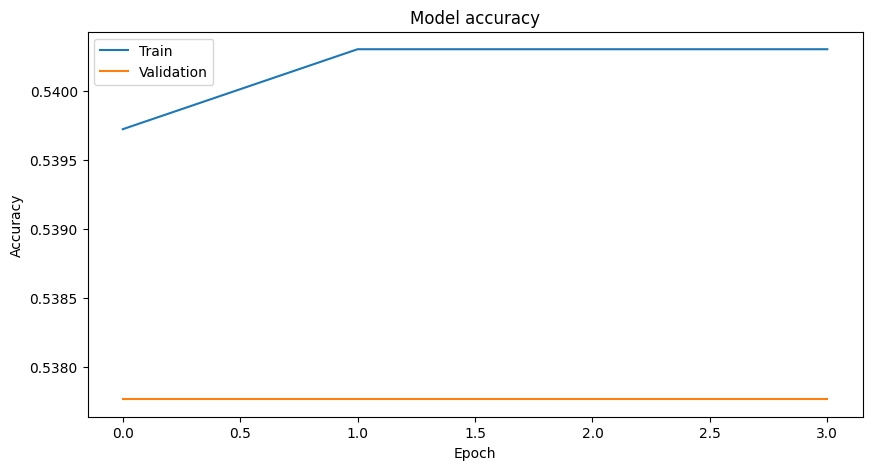

In [23]:
# Assuming 'history' is the variable storing the training history
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

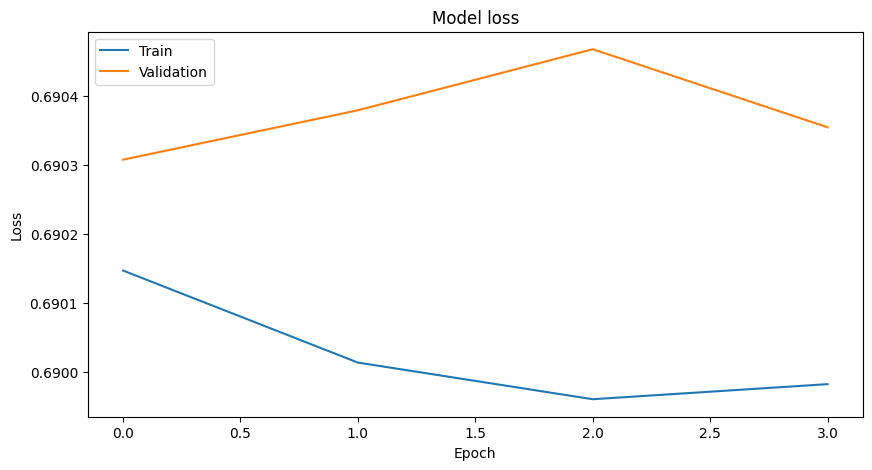

In [24]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

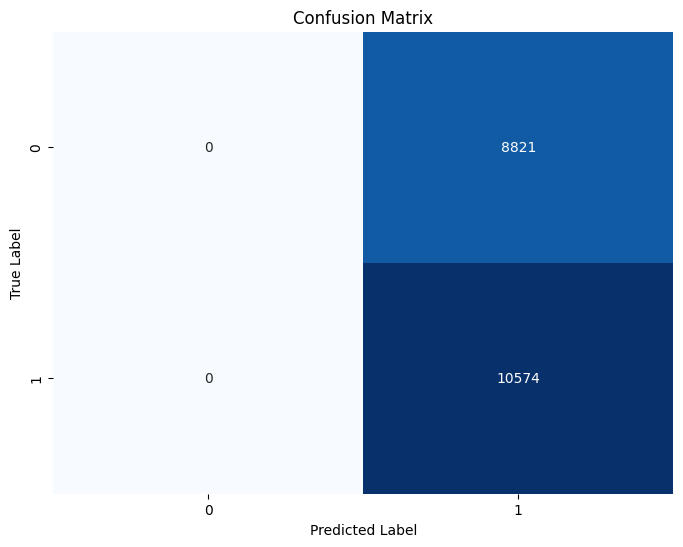

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


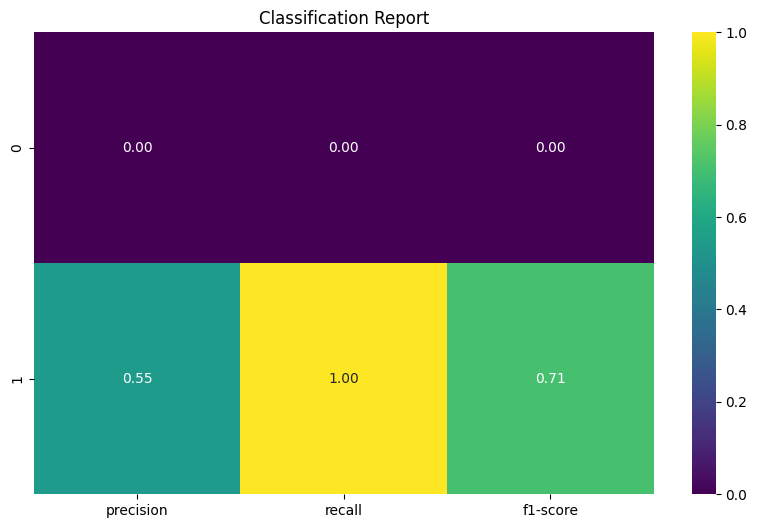

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [27]:
urdu_model.save(f"CNN_model.keras")

Testing with TRAIN DATASET

In [28]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32") # Changed X_test to xx_test for prediction
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4920 - loss: 0.6977
Test Loss: 0.6973147988319397, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# RNN

In [33]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        Conv1D(filters=32, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=2),
        SimpleRNN(100),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# Build and Train Model
rnn_model = build_model(word2vec_embedding_matrix)
rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_1 (Attention)              │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5408, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2704, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 100)                 │          13,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,164,821 (15.89 MB)

 Trainable params: 4,164,821 (15.89 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
rnn_model_history = rnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 596s 305ms/step - accuracy: 0.5335 - loss: 0.6915 - val_accuracy: 0.5378 - val_loss: 0.6904
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 587s 303ms/step - accuracy: 0.5393 - loss: 0.6902 - val_accuracy: 0.5378 - val_loss: 0.6904
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 587s 303ms/step - accuracy: 0.5385 - loss: 0.6902 - val_accuracy: 0.5378 - val_loss: 0.6903


In [36]:
# Evaluate Model
eval_results = rnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - accuracy: 0.5424 - loss: 0.6899
Test Loss: 0.6895540952682495, Test Accuracy: 0.5451920628547668


In [37]:
# Predictions and Metrics
y_pred = (rnn_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351996


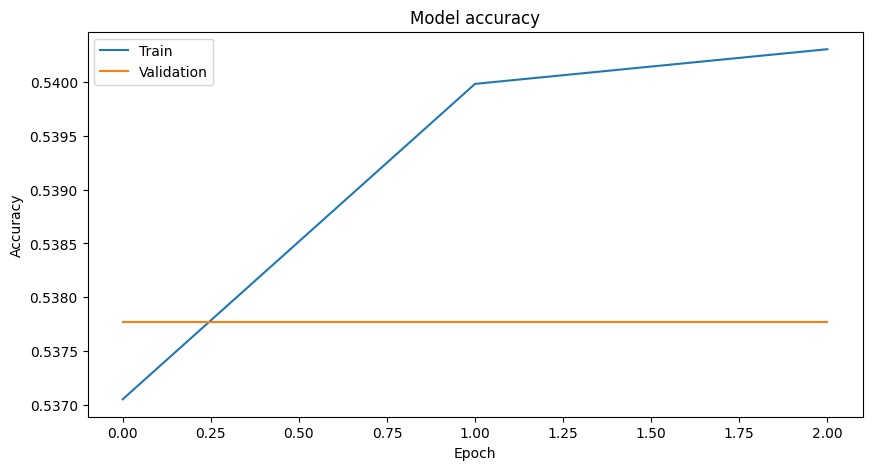

In [38]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(rnn_model_history.history['accuracy'])
plt.plot(rnn_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

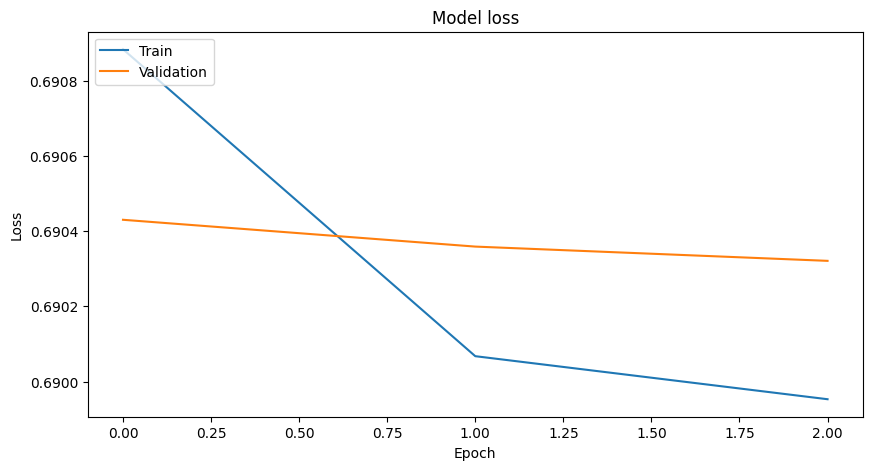

In [39]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(rnn_model_history.history['loss'])
plt.plot(rnn_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

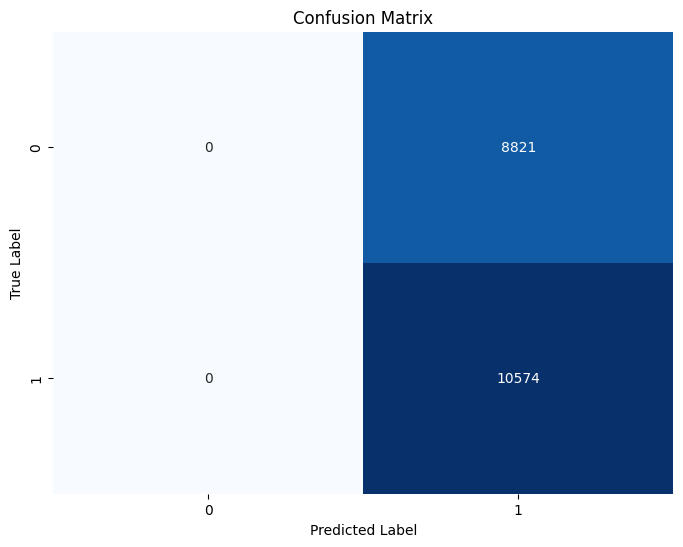

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


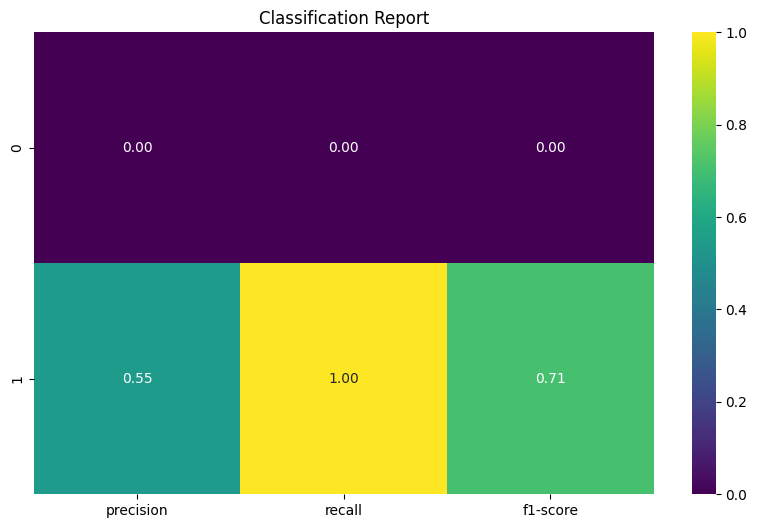

In [41]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [42]:
rnn_model.save(f"RNN_model.keras")

Testing with TRAIN DATASET

In [43]:
# Evaluate Model
eval_results = rnn_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (rnn_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.4920 - loss: 0.6958
Test Loss: 0.6955251693725586, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-RNN

In [21]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        Bidirectional(SimpleRNN(100)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
# Build and Train Model
bi_rnn_model = build_model(word2vec_embedding_matrix)
bi_rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,172,489 (15.92 MB)

 Trainable params: 4,172,489 (15.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
bi_rnn_model_history = bi_rnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2037s 1s/step - accuracy: 0.5323 - loss: 0.6915 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2036s 1s/step - accuracy: 0.5389 - loss: 0.6902 - val_accuracy: 0.5378 - val_loss: 0.6905
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2019s 1s/step - accuracy: 0.5379 - loss: 0.6904 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2020s 1s/step - accuracy: 0.5367 - loss: 0.6905 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 5/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2021s 1s/step - accuracy: 0.5392 - loss: 0.6901 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 6/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2019s 1s/step - accuracy: 0.5397 - loss: 0.6900 - val_accuracy: 0.5378 - val_loss: 0.6904
Epoch 7/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2018s 1s/step - accuracy: 0.5408 - loss: 0.6899 - val_accuracy: 0.5378 - val_loss: 0.6904


In [25]:
# Evaluate Model
eval_results = bi_rnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 209s 345ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891549229621887, Test Accuracy: 0.5451920628547668


In [26]:
# Predictions and Metrics
y_pred = (bi_rnn_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 209s 344ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351996


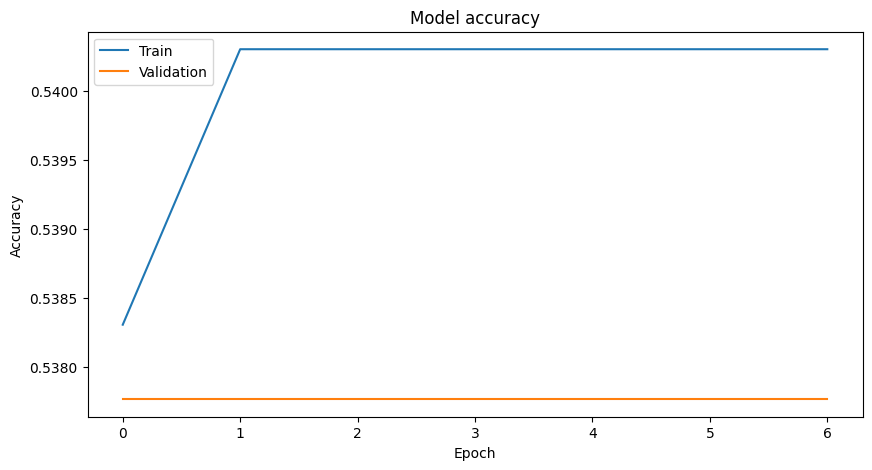

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(bi_rnn_model_history.history['accuracy'])
plt.plot(bi_rnn_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

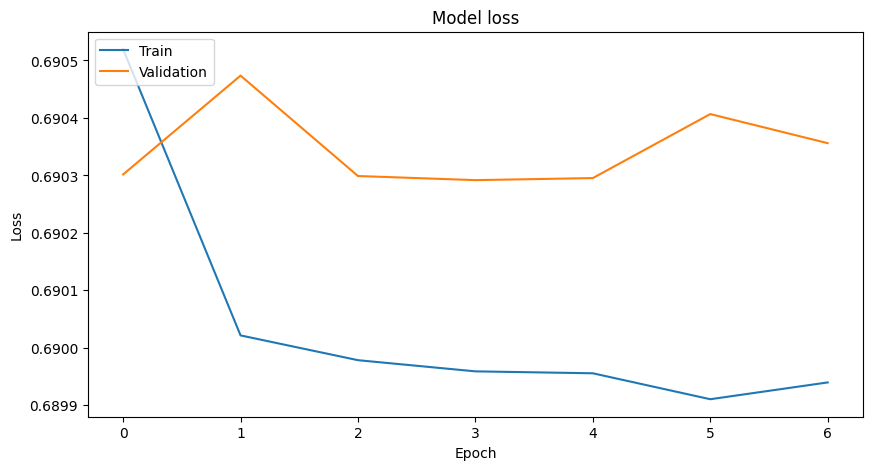

In [29]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(bi_rnn_model_history.history['loss'])
plt.plot(bi_rnn_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

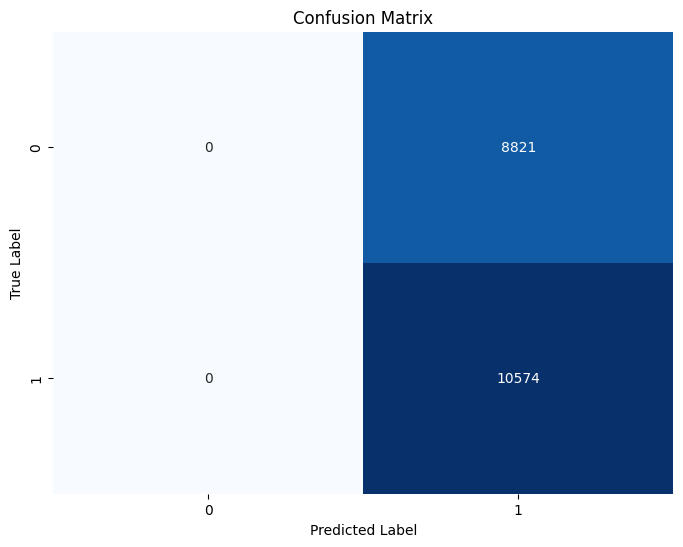

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


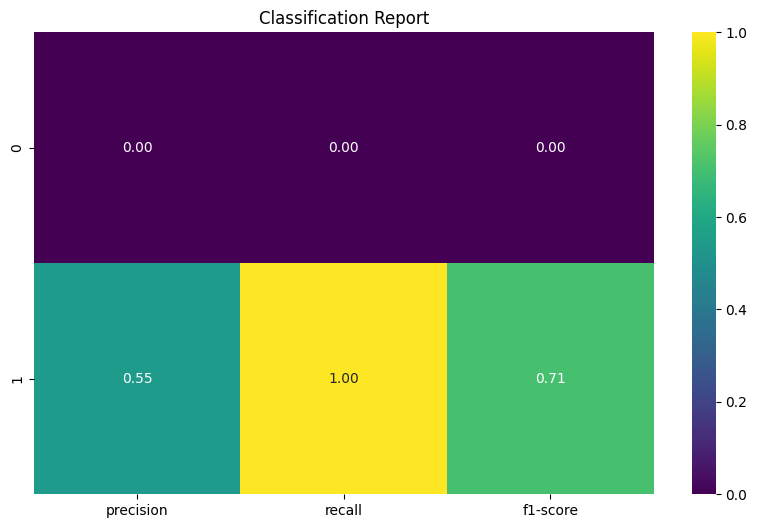

In [30]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [31]:
bi_rnn_model.save(f"Bi-RNN_model.keras")

Testing with TRAIN DATASET

In [32]:
# Evaluate Model
eval_results = bi_rnn_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (bi_rnn_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 345ms/step - accuracy: 0.4920 - loss: 0.6973
Test Loss: 0.6969062089920044, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 344ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# LSTM

In [30]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        LSTM(units=64, dropout=0.2, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_1 (Attention)              │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,165,825 (15.89 MB)

 Trainable params: 4,165,825 (15.89 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 343s 174ms/step - accuracy: 0.5386 - loss: 0.6909 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 347s 179ms/step - accuracy: 0.5386 - loss: 0.6902 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 336s 173ms/step - accuracy: 0.5409 - loss: 0.6898 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 347s 179ms/step - accuracy: 0.5411 - loss: 0.6898 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 5/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 381s 178ms/step - accuracy: 0.5394 - loss: 0.6901 - val_accuracy: 0.5378 - val_loss: 0.6903


In [33]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891793012619019, Test Accuracy: 0.5451920628547668


In [34]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351997


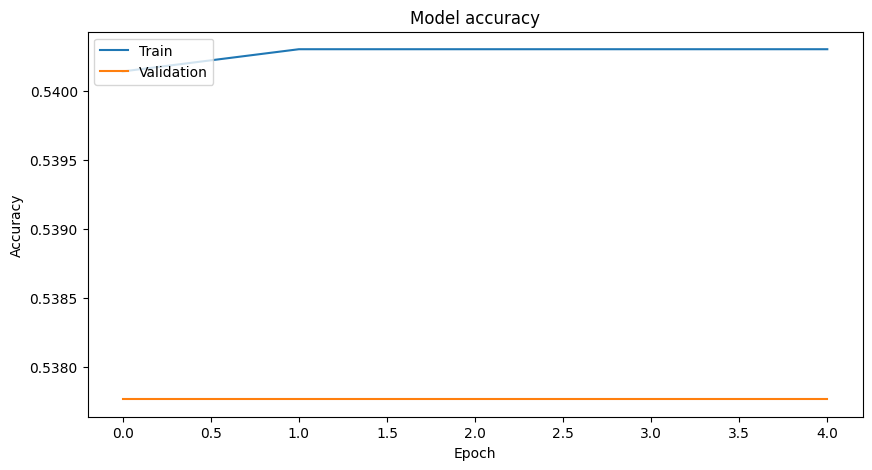

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

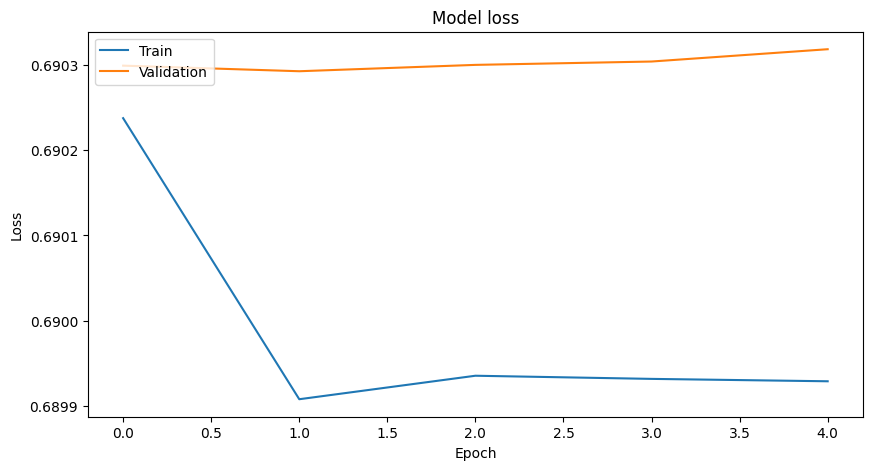

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

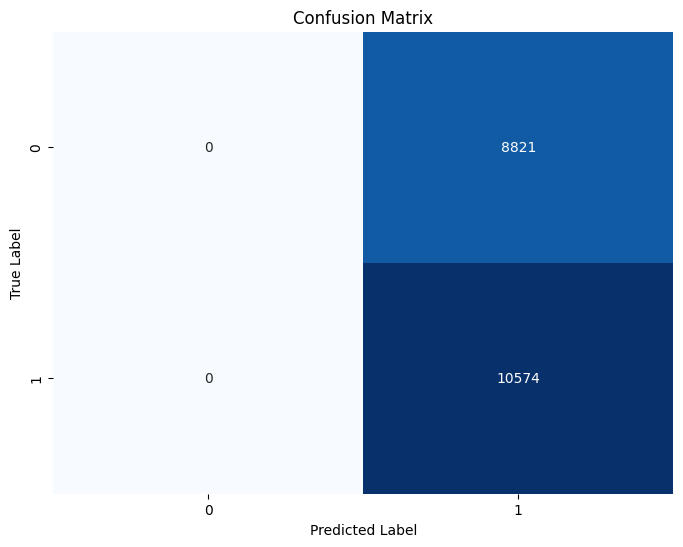

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


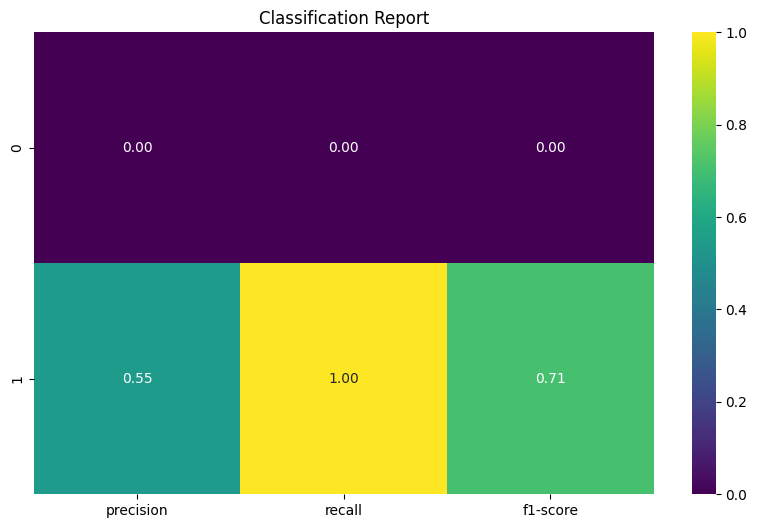

In [38]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [39]:
urdu_model.save(f"LSTM_model.keras")

Testing with TRAIN DATASET

In [40]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4920 - loss: 0.6972
Test Loss: 0.6967668533325195, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-LSTM

In [41]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
# Build and Train Model
urdu_model = build_model(word2vec_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_2 (Attention)              │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,212,161 (16.07 MB)

 Trainable params: 4,212,161 (16.07 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 630s 323ms/step - accuracy: 0.5489 - loss: 0.6816 - val_accuracy: 0.7770 - val_loss: 0.4396
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 682s 323ms/step - accuracy: 0.7975 - loss: 0.4168 - val_accuracy: 0.7983 - val_loss: 0.4048
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 650s 335ms/step - accuracy: 0.8442 - loss: 0.3385 - val_accuracy: 0.7965 - val_loss: 0.4090
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 658s 322ms/step - accuracy: 0.8653 - loss: 0.2928 - val_accuracy: 0.7937 - val_loss: 0.4474
Epoch 5/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 625s 322ms/step - accuracy: 0.8792 - loss: 0.2627 - val_accuracy: 0.7878 - val_loss: 0.4749


In [44]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 77s 126ms/step - accuracy: 0.7889 - loss: 0.4284
Test Loss: 0.42266592383384705, Test Accuracy: 0.7908223867416382


In [ ]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

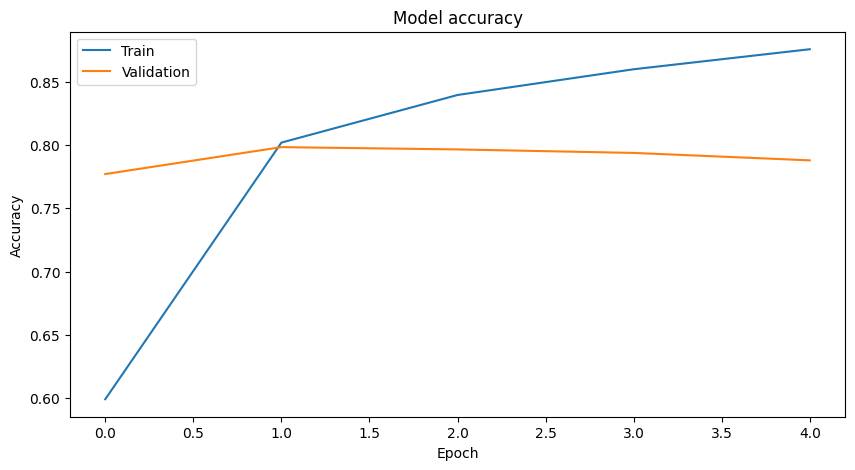

In [46]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

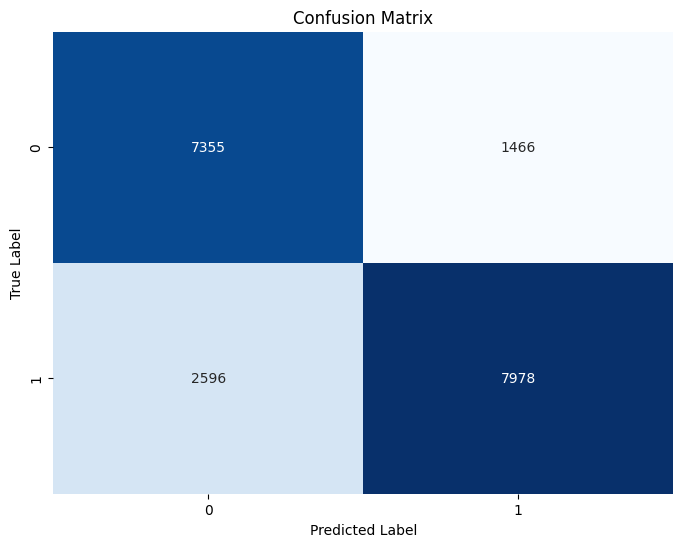

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

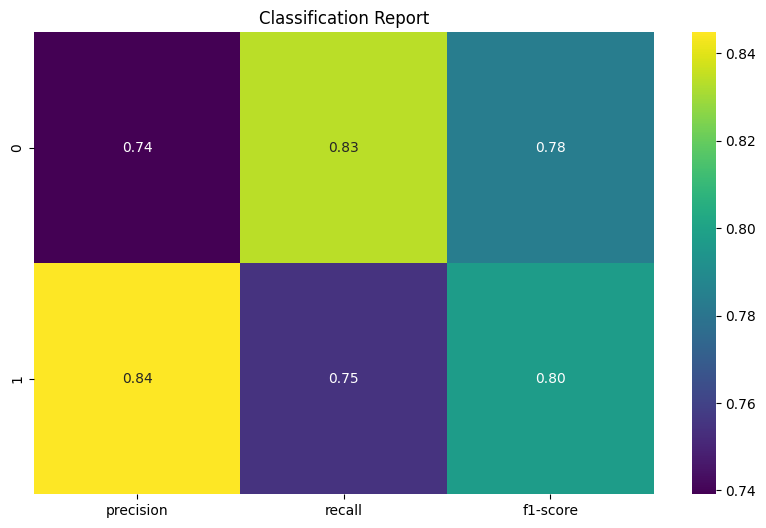

In [49]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [50]:
urdu_model.save(f"Bi-LSTM_model.keras")

Testing with TRAIN DATASET

In [51]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.8352 - loss: 0.3876
Test Loss: 0.3876177966594696, Test Accuracy: 0.8391666412353516
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step
Accuracy: 0.83875
Precision: 0.8053435114503816
Recall: 0.8887952822240943
F1 Score: 0.8450140168201842


# GRU

In [18]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        GRU(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# Build and Train Model
gru_model = build_model(word2vec_embedding_matrix)
gru_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          31,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,155,457 (15.85 MB)

 Trainable params: 4,155,457 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
gru_model_history = gru_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 470s 238ms/step - accuracy: 0.5438 - loss: 0.6907 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 462s 238ms/step - accuracy: 0.5381 - loss: 0.6903 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 462s 238ms/step - accuracy: 0.5402 - loss: 0.6900 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 462s 238ms/step - accuracy: 0.5414 - loss: 0.6897 - val_accuracy: 0.5378 - val_loss: 0.6903


In [21]:
# Evaluate Model
eval_results = gru_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 56s 92ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891170144081116, Test Accuracy: 0.5451920628547668


In [22]:
# Predictions and Metrics
y_pred = (gru_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 53s 87ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351996


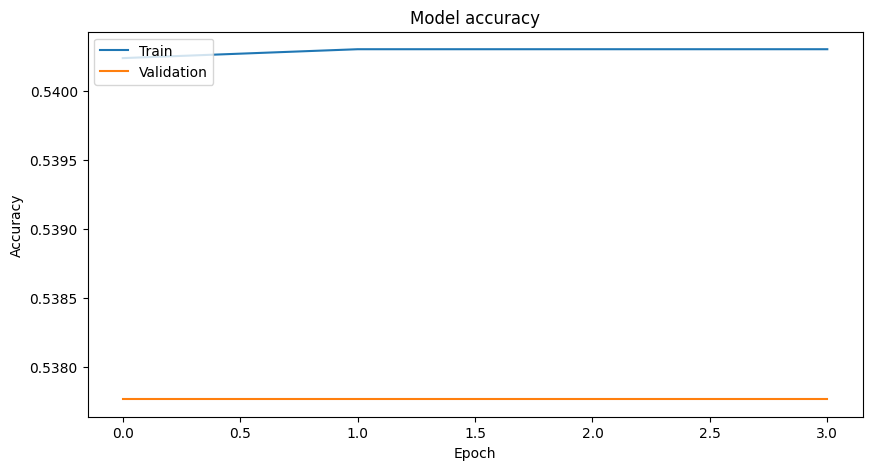

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(gru_model_history.history['accuracy'])
plt.plot(gru_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

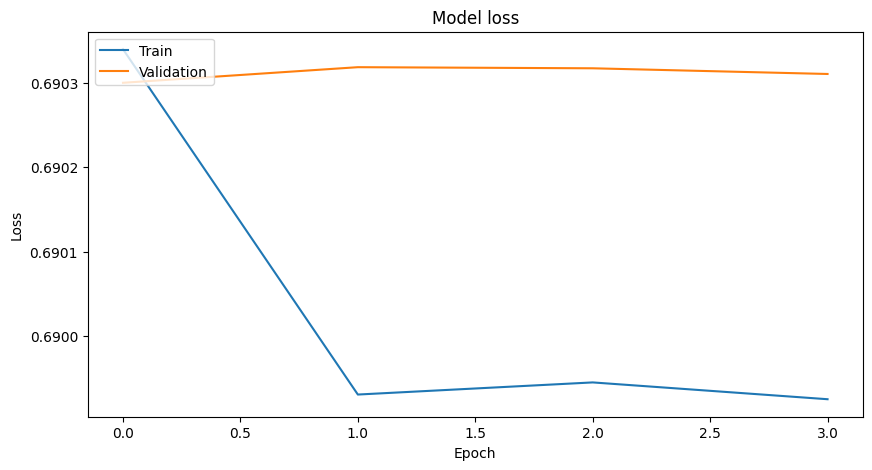

In [24]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(gru_model_history.history['loss'])
plt.plot(gru_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

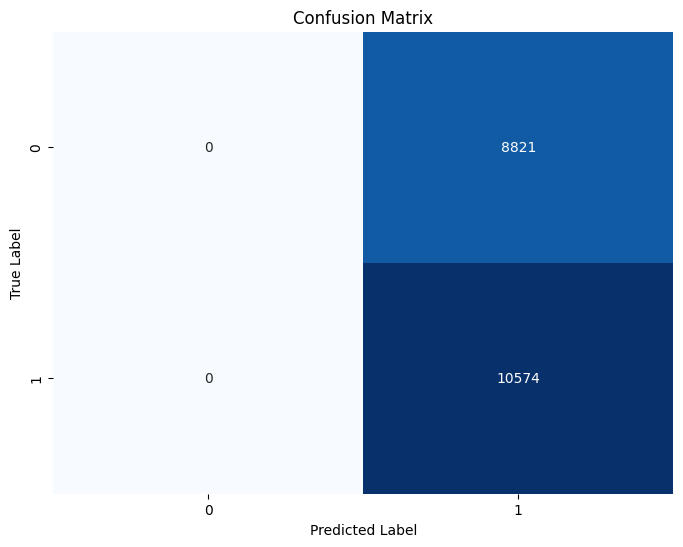

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


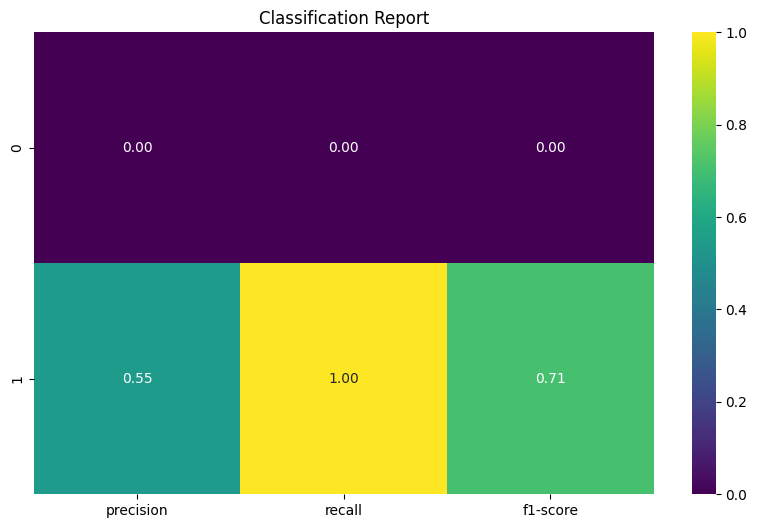

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [27]:
gru_model.save(f"GRU_model.keras")

Testing with TRAIN DATASET

In [28]:
# Evaluate Model
eval_results = gru_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (gru_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.4920 - loss: 0.6976
Test Loss: 0.6971815228462219, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-GRU

In [29]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Attention(return_sequences=True),
        Bidirectional(GRU(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [30]:
# Build and Train Model
bi_gru_model = build_model(word2vec_embedding_matrix)
bi_gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_2 (Attention)              │ (None, 5415, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          63,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,191,425 (15.99 MB)

 Trainable params: 4,191,425 (15.99 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
bi_gru_model_history = bi_gru_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 868s 446ms/step - accuracy: 0.5604 - loss: 0.6702 - val_accuracy: 0.7688 - val_loss: 0.4478
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 864s 445ms/step - accuracy: 0.8057 - loss: 0.4070 - val_accuracy: 0.7960 - val_loss: 0.4004
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 864s 445ms/step - accuracy: 0.8447 - loss: 0.3372 - val_accuracy: 0.7967 - val_loss: 0.4068
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 864s 445ms/step - accuracy: 0.8662 - loss: 0.2944 - val_accuracy: 0.7939 - val_loss: 0.4475
Epoch 5/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 864s 445ms/step - accuracy: 0.8823 - loss: 0.2577 - val_accuracy: 0.7864 - val_loss: 0.4814


In [32]:
# Evaluate Model
eval_results = bi_gru_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 108s 178ms/step - accuracy: 0.7875 - loss: 0.4237
Test Loss: 0.41649213433265686, Test Accuracy: 0.7879350185394287


In [33]:
# Predictions and Metrics
y_pred = (bi_gru_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 106s 174ms/step
Accuracy: 0.7876256767208043
Precision: 0.8297068137705588
Recall: 0.7681104596179308
F1 Score: 0.7977213573638461


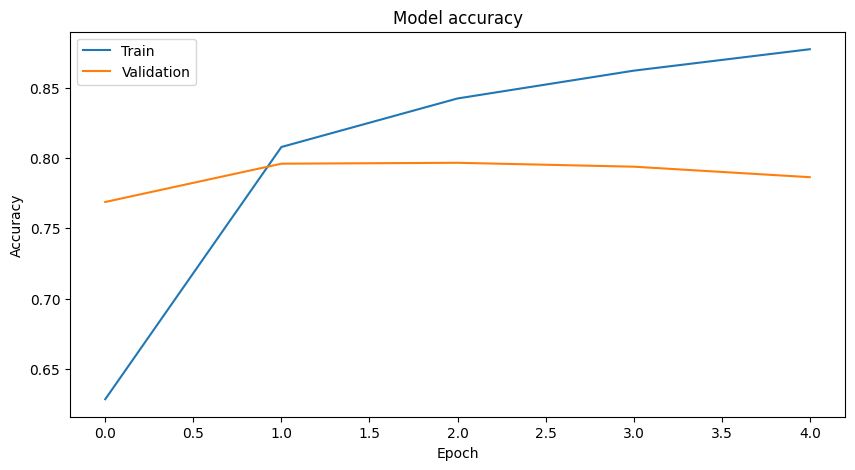

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(bi_gru_model_history.history['accuracy'])
plt.plot(bi_gru_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

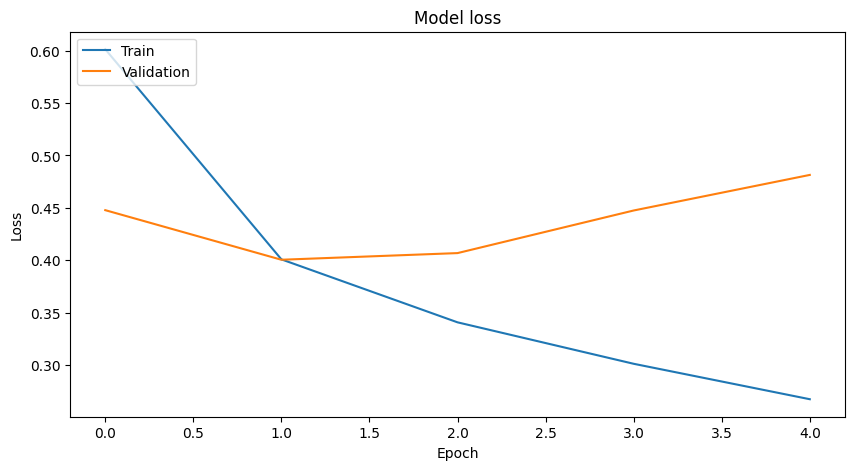

In [35]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(bi_gru_model_history.history['loss'])
plt.plot(bi_gru_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

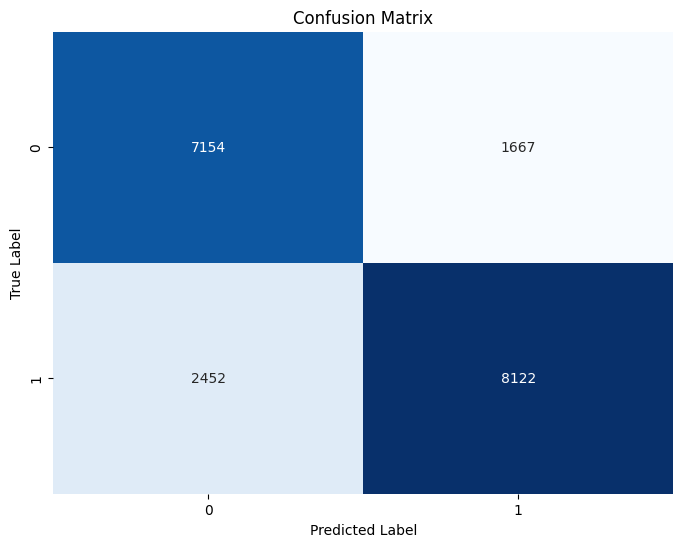

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

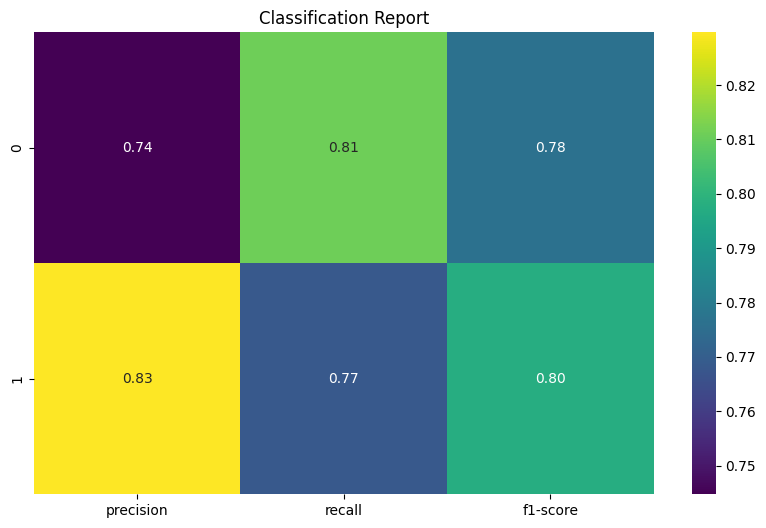

In [37]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [39]:
bi_gru_model.save(f"Bi-GRU_model.keras")

Testing with TRAIN DATASET

In [40]:
# Evaluate Model
eval_results = bi_gru_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (bi_gru_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.8454 - loss: 0.4200
Test Loss: 0.41222187876701355, Test Accuracy: 0.846666693687439
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step
Accuracy: 0.8429166666666666
Precision: 0.8096330275229358
Recall: 0.8921651221566975
F1 Score: 0.8488977955911823
